### Environment setup and Log in to Twitter

In [115]:
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

In [122]:
my_user = "madhu_2161"
my_pass = getpass.getpass()

In [123]:
search_item = "Liz Truss"

In [124]:
PATH = "C:\\Program Files\\chromedriver-win64\\chromedriver.exe"
service = Service(PATH)
driver = webdriver.Chrome(service=service)

driver.get("https://twitter.com/i/flow/login")
sleep(3)

In [125]:
user_id = driver.find_element(By.XPATH, "//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)

In [126]:
password = driver.find_element(By.XPATH, "//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

In [127]:
search_box = driver.find_element(By.XPATH, "//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [128]:
all_tweets = set()

tweets = driver.find_elements(By.XPATH, "//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(3)  
    tweets = driver.find_elements(By.XPATH, "//div[@data-testid='tweetText']")  
    if len(all_tweets) > 50:
        break

In [129]:
all_tweets = list(all_tweets)
all_tweets[0]

'Liz Truss said Britain needs a Donald Trump, and Britain begged to differ – 14 top takes.\nhttps://thepoke.com/2024/11/18/truss-thinks-britain-needs-a-donald-trump/…'

### Cleaning the Tweets

In [130]:
import pandas as pd
import re
pd.options.display.max_colwidth = 1000
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
stp_words = stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [132]:
df = pd.DataFrame(all_tweets, columns=['tweets'])
df.head()

,tweets
0,"Liz Truss said Britain needs a Donald Trump, and Britain begged to differ – 14 top takes.\nhttps://thepoke.com/2024/11/18/truss-thinks-britain-needs-a-donald-trump/…"
1,Liz Truss is on a pro-Trump speaking tour. So we dropped a strategically-positioned remote-controlled lettuce banner
2,Liz Truss storms off stage after lettuce prank
3,Liz Truss was the product of Tory Party hubris – and her fatal error was mistaking impunity for invincibility. \n\nhttps://novaramedia.com/2022/10/20/liz-truss-screwed-up-when-she-machine-gunned-tory-voters/…
4,"Liz Truss's 'why me?' reaction to the Queen's death is quite the thing, but what she then goes on to reveal is equally eyebrow raising."


In [133]:
one_tweet = df.iloc[0]['tweets']
one_tweet

'Liz Truss said Britain needs a Donald Trump, and Britain begged to differ – 14 top takes.\nhttps://thepoke.com/2024/11/18/truss-thinks-britain-needs-a-donald-trump/…'

In [134]:
from textblob import TextBlob
from wordcloud import WordCloud

def TweetCleaning(tweet):
    cleanTweet =re.sub(r"@[a-zA-Z0-9]+", "", tweet)
    cleanTweet =re.sub(r"#[a-zA-Z0-9\s]+", "", cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"

In [135]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tsubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,tweets,cleanedTweets,tPolarity,tsubjectivity,segmentation
0,"Liz Truss said Britain needs a Donald Trump, and Britain begged to differ – 14 top takes.\nhttps://thepoke.com/2024/11/18/truss-thinks-britain-needs-a-donald-trump/…","Liz Truss said Britain needs Donald Trump, Britain begged differ – 14 top takes. https://thepoke.com/2024/11/18/truss-thinks-britain-needs-a-donald-trump/…",0.5,0.50,positive
1,Liz Truss is on a pro-Trump speaking tour. So we dropped a strategically-positioned remote-controlled lettuce banner,Liz Truss pro-Trump speaking tour. So dropped strategically-positioned remote-controlled lettuce banner,0.0,0.00,neutral
2,Liz Truss storms off stage after lettuce prank,Liz Truss storms stage lettuce prank,0.0,0.00,neutral
3,Liz Truss was the product of Tory Party hubris – and her fatal error was mistaking impunity for invincibility. \n\nhttps://novaramedia.com/2022/10/20/liz-truss-screwed-up-when-she-machine-gunned-tory-voters/…,Liz Truss product Tory Party hubris – fatal error mistaking impunity invincibility. https://novaramedia.com/2022/10/20/liz-truss-screwed-up-when-she-machine-gunned-tory-voters/…,0.0,0.00,neutral
4,"Liz Truss's 'why me?' reaction to the Queen's death is quite the thing, but what she then goes on to reveal is equally eyebrow raising.","Liz Truss's 'why me?' reaction Queen's death quite thing, goes reveal equally eyebrow raising.",0.0,0.25,neutral


### Analysis and Visualization

In [136]:
df.pivot_table(index=['segmentation'], aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,11
neutral,20
positive,21


In [137]:
# top 3 positive
df.sort_values(by=['tPolarity'], ascending=False).head(3)

,tweets,cleanedTweets,tPolarity,tsubjectivity,segmentation
22,"Nick Robinson, ""Remember the mini budget?""\n\nNigel Farage bursts into laughter when Liz Truss is brought up\n\nRobinson, ""You're laughing but you said on the day of the mini budget: Today is the best Conservative budget since the 1980s.. Is that the judgment of someone who deserves","Nick Robinson, ""Remember mini budget?"" Nigel Farage bursts laughter Liz Truss brought Robinson, ""You're laughing said day mini budget: Today best Conservative budget since 1980s.. Is judgment someone deserves",1.0,0.3,positive
0,"Liz Truss said Britain needs a Donald Trump, and Britain begged to differ – 14 top takes.\nhttps://thepoke.com/2024/11/18/truss-thinks-britain-needs-a-donald-trump/…","Liz Truss said Britain needs Donald Trump, Britain begged differ – 14 top takes. https://thepoke.com/2024/11/18/truss-thinks-britain-needs-a-donald-trump/…",0.5,0.5,positive
41,Who's the most famous politican you've ever met?\n\nMine is either John Bolton or Liz Truss,Who's famous politican ever met? Mine either John Bolton Liz Truss,0.5,1.0,positive


In [138]:
# top 3 negative
df.sort_values(by=['tPolarity'], ascending=True).head(3)

,tweets,cleanedTweets,tPolarity,tsubjectivity,segmentation
30,This is what Liz Truss could have been if she wasn't so retarded,This Liz Truss could retarded,-0.800000,0.800000,negative
45,"Liz Truss fucked off in a month , Sunak made a couple changes then got pressured to leave, now this donny here these man voted for Keir Starmer, he's gonna drop us right in recession. This country is fucked. Raising taxes, cutting interest and donating to Ukraine, we're so fucked","Liz Truss fucked month , Sunak made couple changes got pressured leave, donny man voted Keir Starmer, he's gonna drop us right recession. This country fucked. Raising taxes, cutting interest donating Ukraine, we're fucked",-0.422857,0.707143,negative
38,BREAKING\n\n'That is the Michael Portillo moment.'\n\nLiz Truss loses Norfolk South West seat.,BREAKING 'That Michael Portillo moment.' Liz Truss loses Norfolk South West seat.,-0.300000,0.100000,negative


In [139]:
# 3 neutral
df[df.tPolarity==0].head(3)

,tweets,cleanedTweets,tPolarity,tsubjectivity,segmentation
1,Liz Truss is on a pro-Trump speaking tour. So we dropped a strategically-positioned remote-controlled lettuce banner,Liz Truss pro-Trump speaking tour. So dropped strategically-positioned remote-controlled lettuce banner,0.0,0.0,neutral
2,Liz Truss storms off stage after lettuce prank,Liz Truss storms stage lettuce prank,0.0,0.0,neutral
3,Liz Truss was the product of Tory Party hubris – and her fatal error was mistaking impunity for invincibility. \n\nhttps://novaramedia.com/2022/10/20/liz-truss-screwed-up-when-she-machine-gunned-tory-voters/…,Liz Truss product Tory Party hubris – fatal error mistaking impunity invincibility. https://novaramedia.com/2022/10/20/liz-truss-screwed-up-when-she-machine-gunned-tory-voters/…,0.0,0.0,neutral


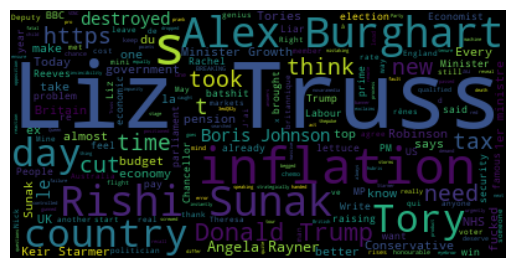

In [140]:
import matplotlib.pyplot as plt
consolidated = ' '.join(word for word in df['cleanedTweets'])

WordCloud = WordCloud(width=400, height=200, random_state=20, max_font_size=120).generate(consolidated)
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [141]:
import seaborn as sns

<Axes: xlabel='tPolarity', ylabel='tsubjectivity'>

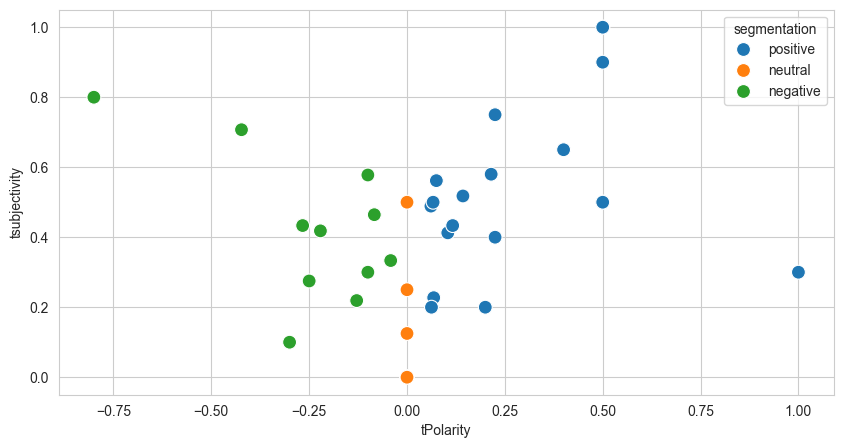

In [142]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity', y='tsubjectivity', s=100, hue='segmentation')

<Axes: xlabel='segmentation', ylabel='count'>

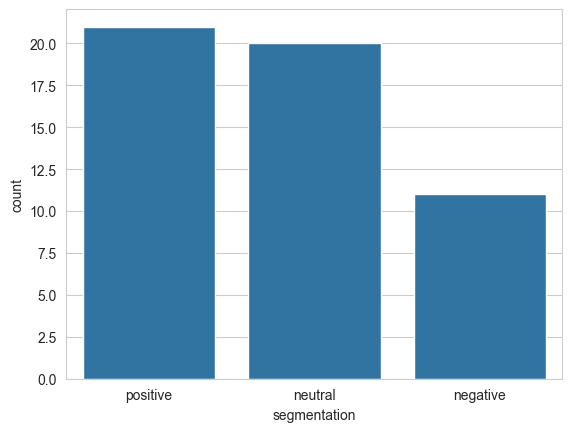

In [143]:
sns.countplot(data=df, x='segmentation')

In [144]:
positive = round(len(df[df.segmentation == 'positive'])/len(df)*100,1)
negative = round(len(df[df.segmentation == 'negative'])/len(df)*100,1)
neutral = round(len(df[df.segmentation == 'neutral'])/len(df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['mayWin', 'mayLoose', 'notSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,mayWin,40.4
1,mayLoose,21.2
2,notSure,38.5
